<h3>Import packages<h3>

In [16]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from factor_analyzer.factor_analyzer import calculate_kmo

<h3>Load data<h3>

In [6]:
df= pd.read_csv("data.csv")
df = df.fillna(df.mean())
df.head()
X = df.drop('Wage',axis=1)
fa = FactorAnalyzer(n_factors=7, rotation='varimax')
fa.fit(X)
loadings = fa.loadings_
ev, v = fa.get_eigenvalues()
a=pd.DataFrame.from_records(loadings)

df_factor = pd.DataFrame(np.abs(fa.loadings_), index=X.columns)
print(df_factor)

                                 0         1         2         3         4  \
Age                       0.082705  0.106681  0.363890  0.087274  0.180603   
Overall                   0.275504  0.170748  0.895368  0.107493  0.165026   
Potential                 0.177377  0.074935  0.709323  0.060455  0.006140   
Preferred Foot            0.071209  0.089627  0.009218  0.055002  0.034973   
International Reputation  0.166093  0.047474  0.501308  0.056153  0.041173   
Weak Foot                 0.364963  0.009116  0.135615  0.058206  0.070207   
Skill Moves               0.771442  0.129394  0.193702  0.213880  0.134121   
Weight                    0.296631  0.038476  0.162024  0.172574  0.743531   
Crossing                  0.727595  0.351285  0.143352  0.221301  0.189196   
Finishing                 0.929973  0.105416  0.083756  0.156788  0.003620   
HeadingAccuracy           0.513534  0.566722  0.039877  0.158171  0.329468   
ShortPassing              0.744037  0.491542  0.242275  0.089544

Text(105.0, 0.5, 'Sepal Width')

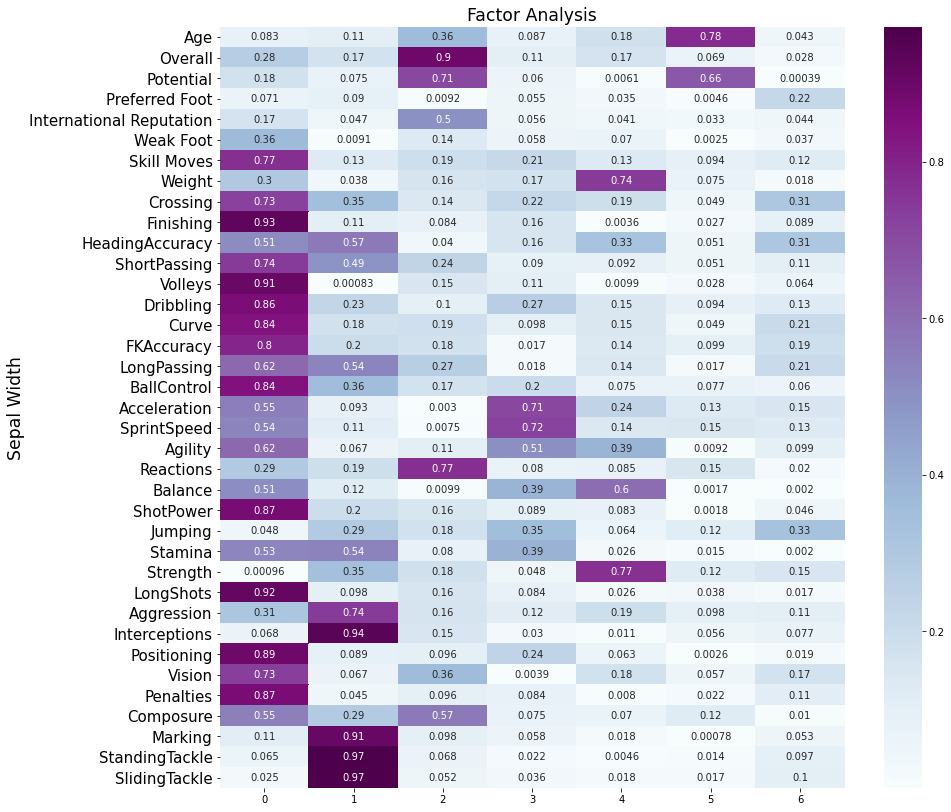

In [10]:
plt.figure(figsize = (14,14))
ax = sns.heatmap(df_cm, annot=True, cmap="BuPu")
ax.yaxis.set_tick_params(labelsize=15)
plt.title('Factor Analysis', fontsize='xx-large')
plt.ylabel('Sepal Width', fontsize='xx-large')

In [11]:
fa = FactorAnalyzer(rotation=None)
fa.fit(df)
fa.loadings_
fa.get_communalities()
ev, v = fa.get_eigenvalues()
var = fa.get_factor_variance()

(array([16.91069752,  4.88487083,  2.85691697]), array([0.44501836, 0.12854923, 0.07518203]), array([0.44501836, 0.57356759, 0.64874961]))


<h3>Scree Plot<h3>

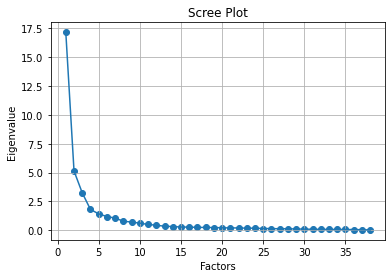

In [12]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

<h3>KMO value<h3>

In [15]:
kmo_all,kmo_model=calculate_kmo(df)
print('KMO=',kmo_model)

KMO= 0.9590872693735903
